# Hausarbeit im Modul „Data Science und Machine Learning“ WS22/23 - Teil 1

In [78]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix
# Import Train Test Split
from sklearn.model_selection import train_test_split
# Import Decision Tree Classifier
from sklearn import tree
# Import Scaler
from sklearn.preprocessing import StandardScaler
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB



# Common imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classifcation"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Task 1
Apply three different simple machine learning models
1. Decision Tree
1. k-nearest neighbor
1. Naive Bayes

Describe your approach, 
interpret the performance, 
and justify (based on the results) which machine learning model you would choose


# 1.1 Decision Trees

## Select and prepare data

In [145]:
# read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Assignment/WiSe22_23/01_FinTech_Churn.csv", sep=";")

# Change column 'churn' to 'label'
df.columns = ['CCreditScore', 'CGeography', 'CGender', 'CAge','CTenure','CBalance','CNumOfProducts','CHasCrCard','CIsActiveMember','CEstimatedSalary','label']
# Show top 5-records
df.head()


,CCreditScore,CGeography,CGender,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [146]:
# Convert categorical variable into dummy/indicator variables with pandas.get_dummie
df1 = pd.get_dummies(df, columns = ['CGeography','CGender']) 
df1.tail()


,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,1,0,0,1,0


In [147]:
df1.describe()

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
# In a frist try I received an error due to an corrupted entry. Here Iam looking for the corrupted entry "Nov 58" in CEstimatedSalary"
search = df1[df1['CEstimatedSalary']=='Nov 58']
search

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
2362,709,45,4,122917.71,1,1,1,Nov 58,1,0,1,0,0,1


In [149]:
# dropping row with entry "Nov 58" in CEstimatedSalary
# it is ok to just drop the value, since only one value ot of 1000 is corrupted 
# renaming df to fintech in order to have a descriptive name
fintech = df1.drop(index=2362)
fintech.head()

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.1,0,0,0,1,1,0


In [150]:
# testing, if corrupted entry "Nov 58" in CEstimatedSalary was dropped"
search2 = fintech[fintech['CEstimatedSalary']=='Nov 58']
search2

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male


In [151]:
# checking the datatypes
print(fintech.dtypes)

CCreditScore            int64
CAge                    int64
CTenure                 int64
CBalance              float64
CNumOfProducts          int64
CHasCrCard              int64
CIsActiveMember         int64
CEstimatedSalary       object
label                   int64
CGeography_France       uint8
CGeography_Germany      uint8
CGeography_Spain        uint8
CGender_Female          uint8
CGender_Male            uint8
dtype: object


In [152]:
#Spliting dataset in two parts: feature set and target label
# in this feature set I use all of the features
feature_set = ['CCreditScore', 'CGeography_France', 'CGeography_Germany','CGeography_Spain','CGender_Female','CGender_Male', 'CAge','CTenure','CBalance','CNumOfProducts','CHasCrCard','CIsActiveMember','CEstimatedSalary']
X = fintech[feature_set]
y = fintech.label
## the feature set below was a test to see what happens if a different feature set is used
#feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','skin']
#X = diabetes[feature_set]
#y = diabetes.label
X  

,CCreditScore,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary
0,619,1,0,0,1,0,42,2,0.00,1,1,1,101348.88
1,608,0,0,1,1,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,0,1,0,39,1,0.00,2,0,0,93826.63
4,850,0,0,1,1,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0,0,0,1,39,5,0.00,2,1,0,96270.64
9996,516,1,0,0,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,0,1,0,36,7,0.00,1,0,1,42085.58
9998,772,0,1,0,0,1,42,3,75075.31,2,1,0,92888.52


## Split dataset

In [153]:
# Partition data into training and testing set

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train decicion tree model


In [154]:
# Create a Decision Tree classifier object
clf_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 0.04)

# Train the model using training dataset
clf_tree = clf_tree.fit(X_train,y_train)


## Evaluate decision tree model (training data)

### Visualization the decision tree

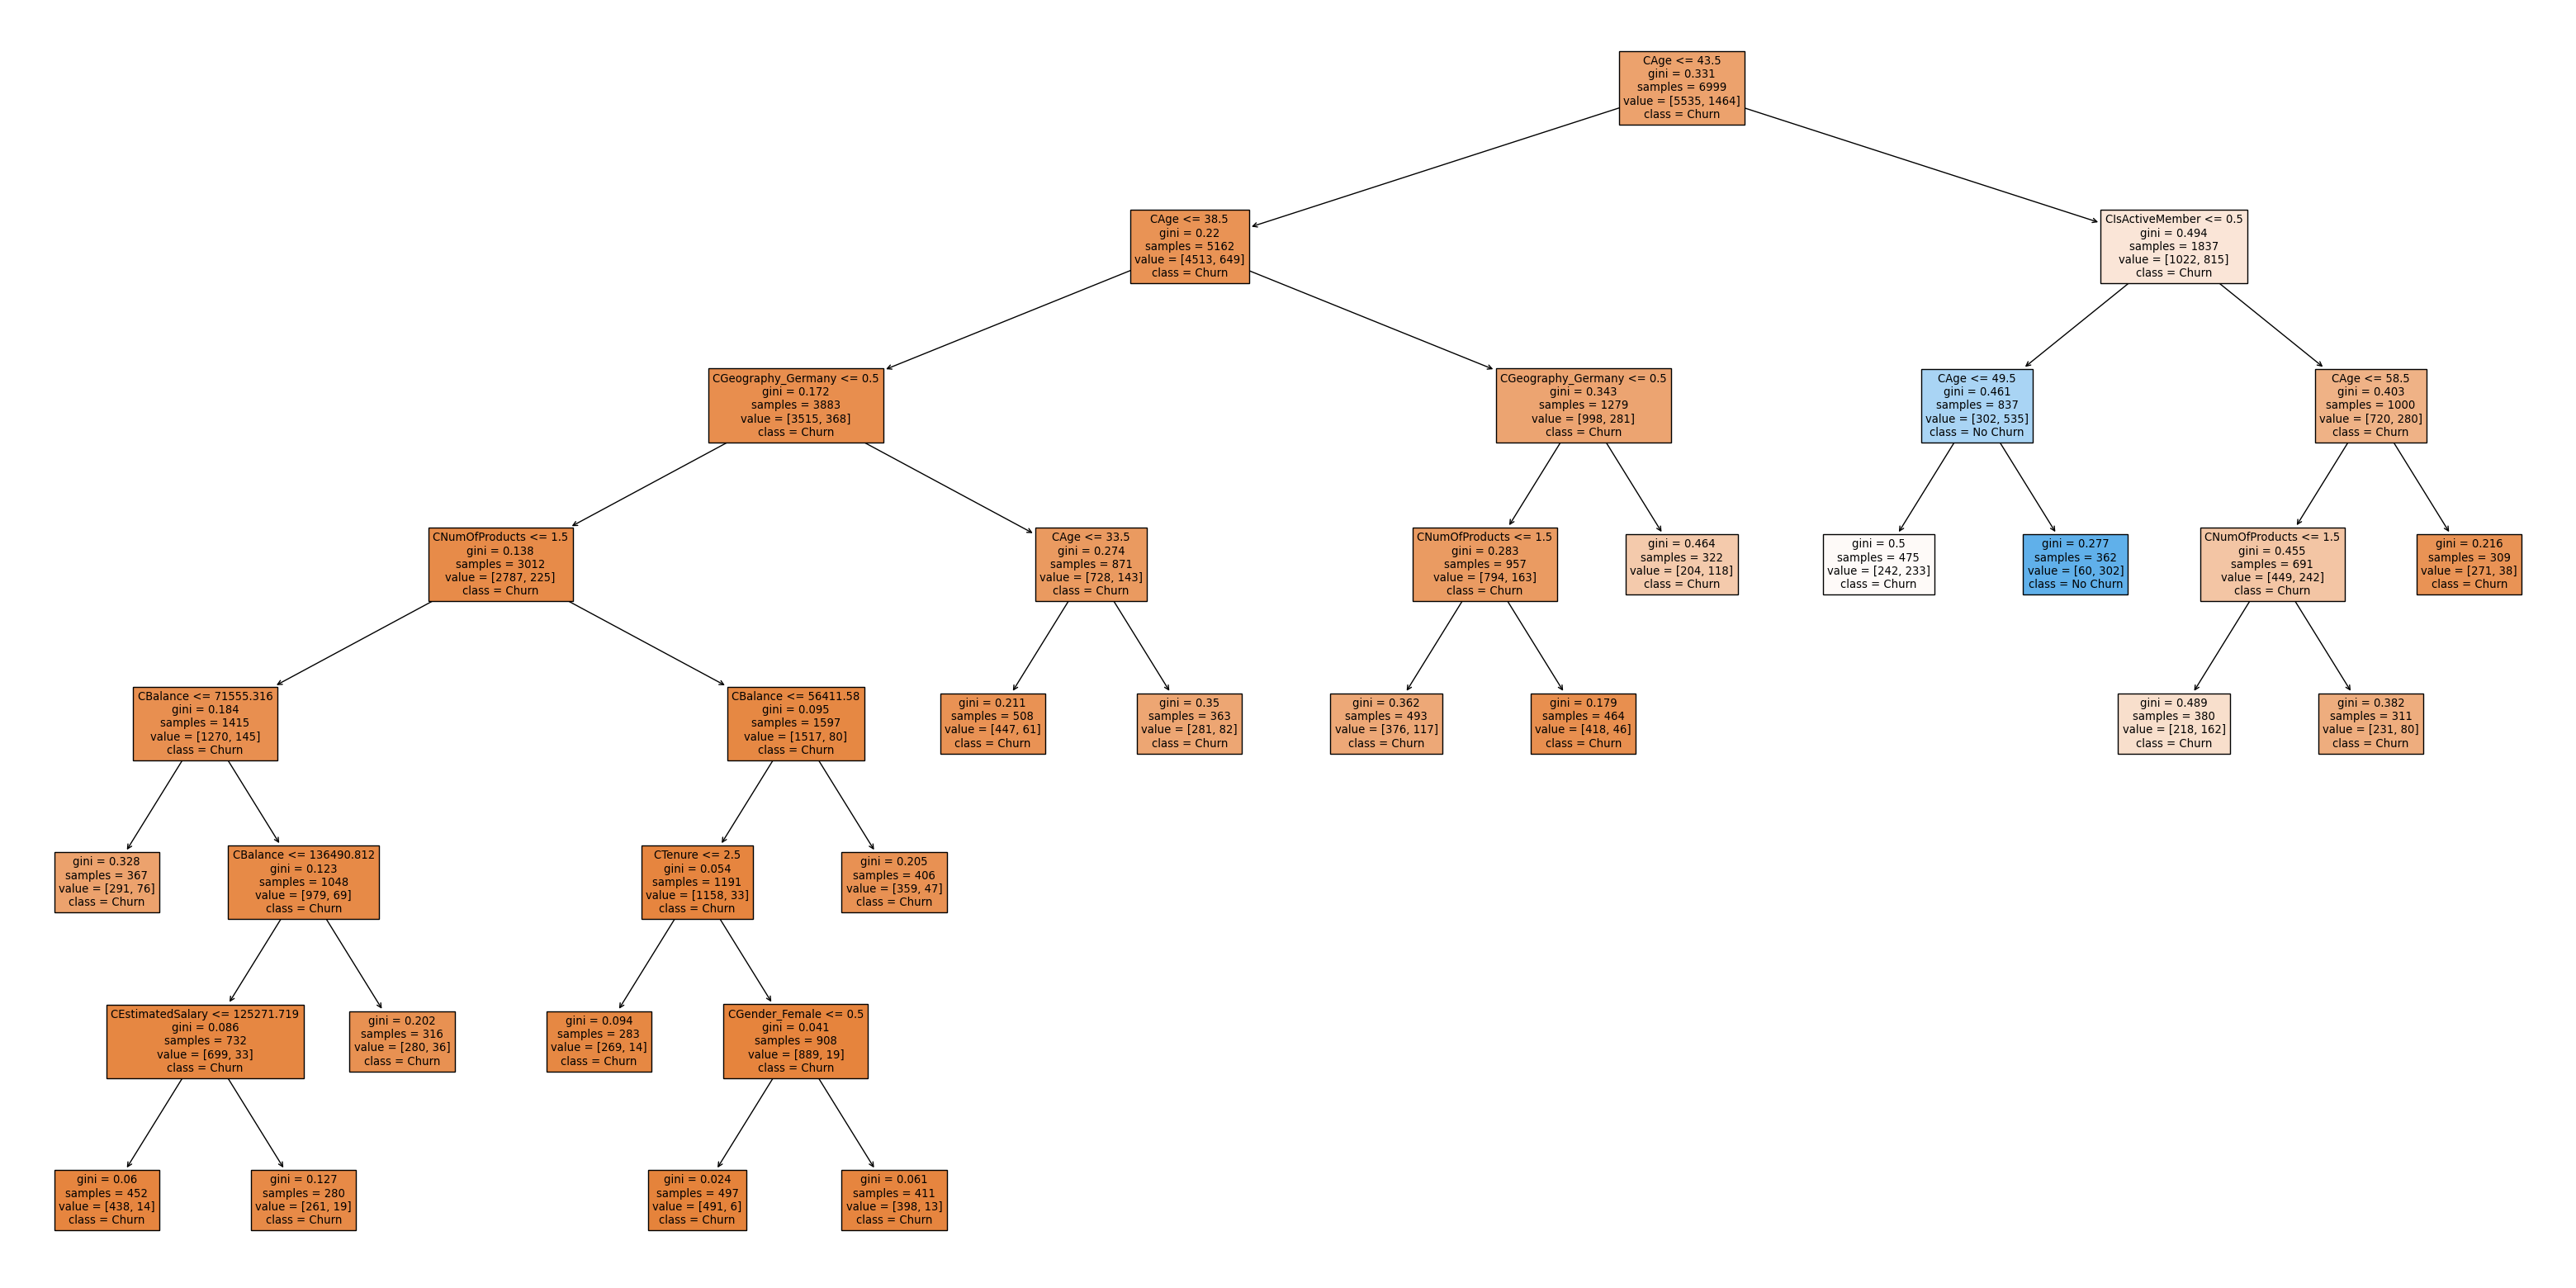

In [155]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf_tree,feature_names = X_train.columns, filled=True, class_names= ["Churn","No Churn"])
plt.show()

### Confusion matrix (training data)

C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


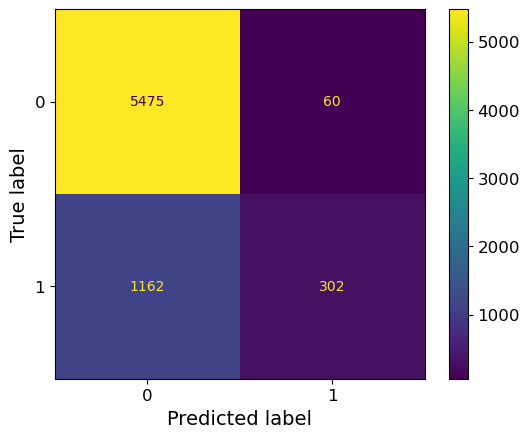

In [156]:
# Plot Confusion matrix
plot_confusion_matrix(clf_tree , X_train, y_train, values_format='d')


In [157]:
# Predict the response for training dataset
y_pred_train = clf_tree.predict(X_train)
np.sum(np.equal(y_train, y_pred_train)) / len(y_train) *100

82.54036290898699

# Classifier Evaluation
## Evaluate decision tree model (test data)
### Confusion matrix (test data)

C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


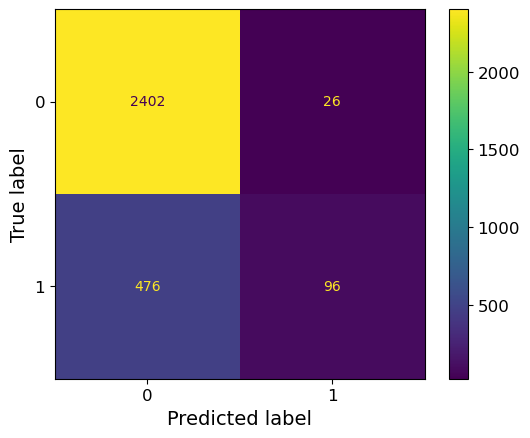

In [158]:
# Predict the response for test dataset
y_pred_test = clf_tree.predict(X_test)

# Plot Confusion matrix
plot_confusion_matrix(clf_tree , X_test, y_test, values_format='d')


In [159]:
np.sum(np.equal(y_test, y_pred_test)) / len(y_pred_test) *100

83.26666666666667

### Performance metrics

In [160]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test)*100)
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test)*100)
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test)*100)


Accuracy: 83.26666666666667
Precision: 78.68852459016394
Recall: 16.783216783216783
F1-Score: 27.6657060518732


# 1.2 k-Nearest Neighbors (kNN)

## Select and prepare data

In [163]:
# Select and prepare was done in task 1.1. Reusing datafram fintech
# read the dataset
#fintech = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Assignment/WiSe22_23/01_FinTech_Churn.csv", sep=";")
# Change column 'churn' to 'label'
#fintech.columns = ['CCreditScore', 'CGeography', 'CGender', 'CAge','CTenure','CBalance','CNumOfProducts','CHasCrCard','CIsActiveMember','CEstimatedSalary','label']
# Show top 5-records
fintech.head()


,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.1,0,0,0,1,1,0


In [164]:
#Spliting dataset in two parts: feature set and target label
feature_set = ['CCreditScore', 'CGeography_France', 'CGeography_Germany','CGeography_Spain','CGender_Female','CGender_Male', 'CAge','CTenure','CBalance','CNumOfProducts','CHasCrCard','CIsActiveMember','CEstimatedSalary']
X = fintech[feature_set]
y = fintech.label

X  



,CCreditScore,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary
0,619,1,0,0,1,0,42,2,0.00,1,1,1,101348.88
1,608,0,0,1,1,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,0,1,0,39,1,0.00,2,0,0,93826.63
4,850,0,0,1,1,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,0,0,0,1,39,5,0.00,2,1,0,96270.64
9996,516,1,0,0,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,0,1,0,36,7,0.00,1,0,1,42085.58
9998,772,0,1,0,0,1,42,3,75075.31,2,1,0,92888.52


## Split dataset

In [187]:
# Partition data into training and testing set

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train) #fit the Scaler only with training data, so that the test data does not influence the Scaler
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) #Test data is also scaled, but the Scaler is only fitted with the training data
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.327974,-1.013087,-0.570586,1.741840,1.094298,-1.094298,-0.666333,-0.350463,1.587576,0.823570,0.649602,0.977814,1.248219
1,-1.146053,0.987082,-0.570586,-0.574106,-0.913828,0.913828,-1.333593,-0.004449,0.639500,-0.899134,0.649602,-1.022689,-1.516847
2,0.883612,-1.013087,-0.570586,1.741840,-0.913828,0.913828,-0.666333,0.687577,-1.219341,-0.899134,-1.539404,0.977814,-0.377534
3,-0.338329,-1.013087,1.752585,-0.574106,-0.913828,0.913828,0.191572,1.033591,-0.616006,-0.899134,0.649602,0.977814,1.646947
4,0.645437,-1.013087,1.752585,-0.574106,1.094298,-1.094298,2.098027,-0.350463,1.173422,0.823570,0.649602,-1.022689,0.395893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,-0.680059,-1.013087,-0.570586,1.741840,1.094298,-1.094298,0.477540,-0.350463,-1.219341,0.823570,-1.539404,0.977814,0.015344
6995,0.127665,0.987082,-0.570586,-0.574106,1.094298,-1.094298,0.000926,1.033591,-1.219341,0.823570,0.649602,0.977814,0.005636
6996,-0.120865,-1.013087,-0.570586,1.741840,1.094298,-1.094298,-1.142947,1.033591,0.921883,0.823570,0.649602,-1.022689,-1.641071
6997,0.169087,0.987082,-0.570586,-0.574106,-0.913828,0.913828,0.382217,1.033591,1.824753,-0.899134,0.649602,-1.022689,-0.057875


## Train kNN model

In [189]:
# searching for k
# Practice suggest choosing the value of k is k = sqrt(N) (N stands for the number of samples in your training dataset)
# To select the k that’s right for your data, we run the kNNalgorithm several times with different values of k 
# and choose the k that reduces the number of errors we encounter while maintaining the algorithm’s ability 
# to accurately make predictions when it’s given data it hasn’t seen before

print(math.sqrt(6999))


83.66002629691195


In [190]:
# Create a KNN classifier object
clf_kNN = KNeighborsClassifier(n_neighbors=14)

# Train the model using the training dataset
clf_kNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=14)

## Evaluate KNN model (training dataset)

In [191]:
# Predict the y variable for train dataset
y_pred_train_knn = clf_kNN.predict(X_train_scaled)

# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_knn))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_knn))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_knn))

Accuracy: 0.8394056293756251
Precision: 0.8014184397163121
Recall: 0.3087431693989071
F1-Score: 0.44575936883629186


C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Evaluate KNN model (test dataset)

In [192]:
# Predict the y variable for test dataset
y_pred_test_knn = clf_kNN.predict(X_test_scaled)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_knn))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_knn))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_knn))

Accuracy: 0.8446666666666667
Precision: 0.7476635514018691
Recall: 0.27972027972027974
F1-Score: 0.4071246819338423


C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## The right number for k

In [62]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, pred_i))

C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pknuhman\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

Text(0, 0.5, 'Accuracy')

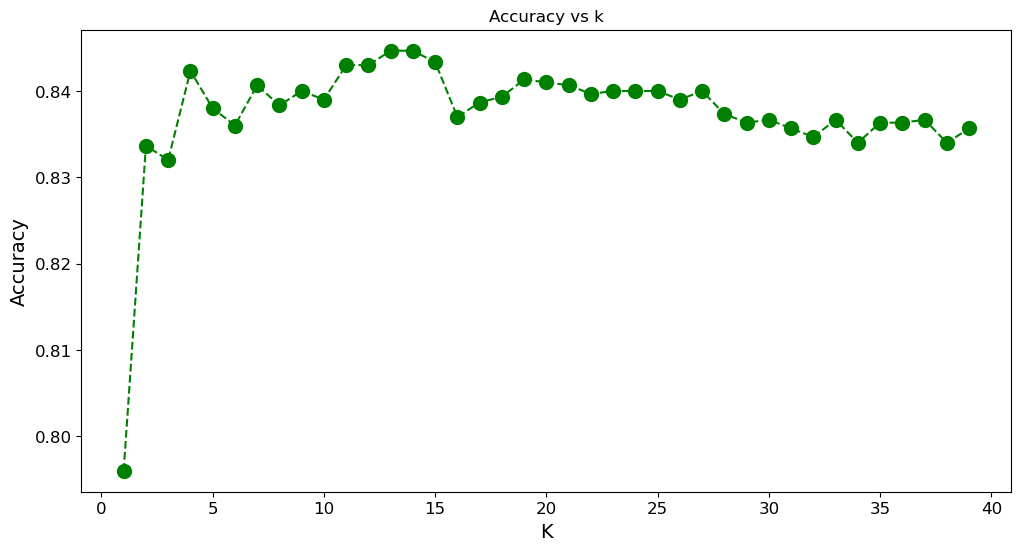

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Accuracy vs k')
plt.xlabel('K')
plt.ylabel('Accuracy')

# 1.3 Naive Bayes

## Select and prepare data

In [172]:
# using fintech as prepared dataframe from before
# Show top 5-records
fintech.head()

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,label,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.1,0,0,0,1,1,0


In [173]:
#Spliting dataset in two parts: feature set and y label

#Spliting dataset in two parts: feature set and target label
feature_set = ['CCreditScore', 'CGeography_France', 'CGeography_Germany','CGeography_Spain','CGender_Female','CGender_Male', 'CAge','CTenure','CBalance','CNumOfProducts','CHasCrCard','CIsActiveMember','CEstimatedSalary']
X = fintech[feature_set]
y = fintech.label

X.head()  

,CCreditScore,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary
0,619,1,0,0,1,0,42,2,0.00,1,1,1,101348.88
1,608,0,0,1,1,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,0,1,0,39,1,0.00,2,0,0,93826.63
4,850,0,0,1,1,0,43,2,125510.82,1,1,1,79084.1


## Split dataset

In [174]:
# Partition data into training and testing set

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train naive bayes model

In [175]:
# Create a Gaussian Classifier
clf_gnb = GaussianNB()
 
# Train the model using the training sets
clf_gnb.fit(X_train,y_train)


GaussianNB()

## Evaluate naive bayes model (training data)

In [176]:
# Predict the y variable for the test dataset
y_pred_train_gnb = clf_gnb.predict(X_train)

 
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_gnb))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_gnb))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_gnb))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_gnb))

Accuracy: 0.7792541791684526
Precision: 0.3865546218487395
Recall: 0.0942622950819672
F1-Score: 0.1515650741350906


## Evaluate naive bayes model (test data)

In [177]:
# Predict the y variable for the test dataset
y_pred_test_gnb = clf_gnb.predict(X_test)

 
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_gnb))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_gnb))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_gnb))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_gnb))

Accuracy: 0.7946666666666666
Precision: 0.35333333333333333
Recall: 0.09265734265734266
F1-Score: 0.14681440443213298


# Discussion

1. Accuracy: Informally, accuracy is the fraction of predictions the model got right. Formally, accuracy has the following definition: Accuracy = # of correct predictions / total # of predictions
1. Precision: What proportion of positive identifications was actually correct? precision is the number of true positive results divided by the number of all positive results, including those not identified correctly
1. Recall: What proportion of actual positives was identified correctly? recall is the number of true positive results divided by the number of all samples that should have been identified as positive
1. F1-Score: F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test

In [185]:
# Create dataframe to compare results
# Creating the first Dataframe using dictionary
compare_results = df = pd.DataFrame({"Decision Tree":[accuracy_score(y_test, y_pred_test)*100, precision_score(y_test, y_pred_test)*100,recall_score(y_test, y_pred_test)*100,f1_score(y_test, y_pred_test)*100],
                         "kNN":[accuracy_score(y_test, y_pred_test_knn)*100, precision_score(y_test, y_pred_test_knn)*100,recall_score(y_test, y_pred_test_knn)*100,f1_score(y_test, y_pred_test_knn)*100],
                         "Naive Bayes":[accuracy_score(y_test, y_pred_test_gnb)*100, precision_score(y_test, y_pred_test_gnb)*100,recall_score(y_test, y_pred_test_gnb)*100,f1_score(y_test, y_pred_test_gnb)*100]
                        })
  
# Change the row indexes
compare_results.index = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
  
# Print 
print(compare_results, "\n")


           Decision Tree        kNN  Naive Bayes
Accuracy       83.266667  84.466667    79.466667
Precision      78.688525  74.766355    35.333333
Recall         16.783217  27.972028     9.265734
F1-Score       27.665706  40.712468    14.681440 



# Task 2.
Select the machine learning model that you have chosen in task 1. 
Now try optimizing your results by applying the advanced concepts (lecture 04). Use cross-validation (lecture 04) when evaluating your results. Describe your approach, interpret the performance, and justify which machine learning model you would choose.